In [1]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("imthanhlv/gpt2news")
from tqdm import tqdm

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [22]:
from ftfy import fix_text

In [2]:
t = torch.load("./raw/train_img_b16.pt")
print(t.keys())

e, t, ids = t['clip_embedding'], t['target'], t['id']
ids = np.array(ids)
enp = e.numpy()
cs = cosine_similarity(enp, enp)

sentences = [tokenizer.decode(i, skip_special_tokens=True) for i in t]
img_path = "/Users/lethanh/workspace/1.projects/completed/clip_prefix_gpt/"

dict_keys(['clip_embedding', 'target', 'id'])


### Tính stats của bộ training

In [3]:
def get_length_token(target, pad_token=1):
    return (target != pad_token).sum().item()

get_length_token(t[0])

8

In [5]:
lengths = [get_length_token(i) for i in tqdm(t)]

100%|██████████| 8962/8962 [00:00<00:00, 155218.86it/s]


In [6]:
np.where(np.array(lengths) == 3)

(array([471]),)

In [7]:
parts = [i.strip().split(".") for i in sentences]
lp = [len(i) for i in parts if i]

In [8]:
np.unique(lp, return_counts=True)

(array([1, 2, 3]), array([  41, 8916,    5]))

In [9]:
np.where(np.array(lp) == 3)[0]

array([ 197, 3102, 6380, 6899, 8173])

In [10]:
["." in i for i in np.array(sentences)[np.where(np.array(lp) == 3)[0]]]

[True, True, True, True, True]

__NA__


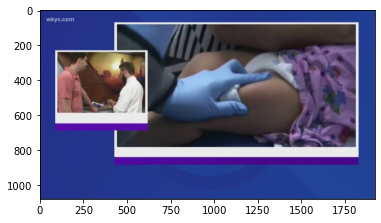

In [11]:
i = 471
print(sentences[i])
plt.imshow(Image.open(img_path + ids[i]))

In [12]:
print("Stats", min(lengths), max(lengths), np.average(lengths))

Stats 3 39 12.961504128542735


In [13]:
unique_tokens = np.unique(t.numpy())

Normalize rule:
- length: min 5 tokens, max 39, avg. 13
- Capitalize first letter, end sentence with "."
- If sentence doesn't end with ".", add it
- If sentences ends with two "..", replace into "."

In [23]:
def normalize(sentence):
    sentence = fix_text(sentence.strip())
    if sentence[-1] != ".":
        sentence += "."
    if sentence[-2:] == "..":
        sentence = sentence[:-1]
    if not sentence[0].isupper():
        sentence = sentence[0].upper() + sentence[1:]
    return sentence.split(".")[0] + "."

print(sentences[8173])
print(normalize(sentences[8173]))

Một nhân viên y tế tiến hành lấy mẫu xét nghiệm cho người trong xe ô tô. Đoàn xe ô tô đỗ trên đường và nữ nhân viên y tế đang lấy mẫu cho người trong xe.
Một nhân viên y tế tiến hành lấy mẫu xét nghiệm cho người trong xe ô tô.


In [24]:
for i in sentences:
    ni = normalize(i)
    if ni != i:
        print(i)
        print(ni)
        print("----------------------")

Một người mặc đồ bảo hộ màu xanh đang ôm một cụ già
Một người mặc đồ bảo hộ màu xanh đang ôm một cụ già.
----------------------
Nhóm nhân viên y tế mặc đồ bảo hộ đang kéo một chiếc giường bệnh từ trên một chiếc xe tải xuống dưới. 
Nhóm nhân viên y tế mặc đồ bảo hộ đang kéo một chiếc giường bệnh từ trên một chiếc xe tải xuống dưới.
----------------------
Các viên thuốc con nhộng có màu xanh lá và màu trắng..
Các viên thuốc con nhộng có màu xanh lá và màu trắng.
----------------------
Nhân viên đang làm việc trong phòng thí nghiệm. 
Nhân viên đang làm việc trong phòng thí nghiệm.
----------------------
Một người rút bông xét nghiệm cho người trong xe ô tô
Một người rút bông xét nghiệm cho người trong xe ô tô.
----------------------
Một người da màu đang mặc đồ bảo hộ. 
Một người da màu đang mặc đồ bảo hộ.
----------------------
__NA__
__NA__.
----------------------
Virus đang lơ lửng trong không gian. 
Virus đang lơ lửng trong không gian.
----------------------
Một người đàn ông lớn tuổi

Các nhân viên y tế đang làm việc. 
Các nhân viên y tế đang làm việc.
----------------------
Bên trong một nhà thờ vắng. 
Bên trong một nhà thờ vắng.
----------------------
Một người đàn ông trước kệ hàng trong siêu thị. Các kệ hàng trong siêu thị đã gần hết.
Một người đàn ông trước kệ hàng trong siêu thị.
----------------------
Người phụ nữ đang bế đứa bé cho bác sĩ khám
Người phụ nữ đang bế đứa bé cho bác sĩ khám.
----------------------
Cận cảnh nữ nhân viên đang làm việc trong phòng thí nghiệm
Cận cảnh nữ nhân viên đang làm việc trong phòng thí nghiệm.
----------------------
Virus đang lơ lửng trong không gian. 
Virus đang lơ lửng trong không gian.
----------------------
Bên trong căn phòng có rất nhiều giường bệnh và nhân viên y tế. 
Bên trong căn phòng có rất nhiều giường bệnh và nhân viên y tế.
----------------------
Một bác sĩ đang kiểm tra thiết bị y tế
Một bác sĩ đang kiểm tra thiết bị y tế.
----------------------
Nhân viên an ninh áo xanh đang nói chuyện với người phụ nữ áo nâ

In [27]:
[normalize(i) for i in sentences[10:20]]

['Một người phụ nữ đang nằm ngủ trên giường bệnh.',
 'Một người đang cầm kim tiêm chuẩn bị tiêm.',
 'Một bác sĩ cầm phim chụp X-quang giơ lên cao.',
 'Bàn tay đeo găng màu xanh đang kiểm tra mẫu xét nghiệm.',
 'Bàn tay và khay đựng ống xét nghiệm.',
 'Người đàn ông da màu đang đưa tay trước miệng.',
 'Người phụ nữ đang cầm cặp nhiệt kế.',
 'Cô gái mặc áo vàng đang lấy tay xoa mũi.',
 'Hai nhân viên đang làm việc trong phòng thí nghiệm.',
 'Nhóm người đang làm việc trong phòng thí nghiệm.']

In [28]:
cleaned_sentences = [normalize(i) for i in sentences]

In [29]:
np.where(["A man" in i for i in cleaned_sentences])

(array([817]),)

In [31]:
drop_ids = [471, 817]
for i in drop_ids:
    print(cleaned_sentences[i])

__NA__.
A man in a hospital gown being carried by a man in a wheelchair.


In [32]:
tokenizer.pad_token = "<pad>"

In [33]:
def tokenize(text):
    return tokenizer.encode(
        text, max_length=64, truncation=True, padding="max_length"
    )


In [34]:
cleaned_target = [tokenize(i) for i in cleaned_sentences]

In [35]:
cleaned_target = torch.tensor(cleaned_target)
print(cleaned_target.shape)

torch.Size([8962, 64])


### Deduplicated

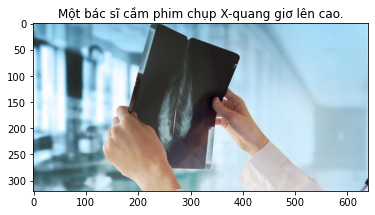

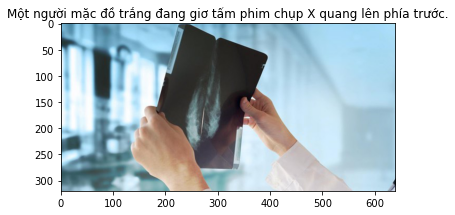

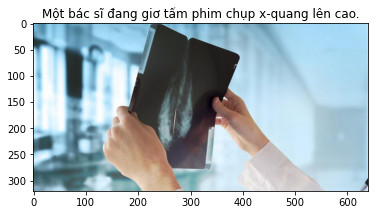

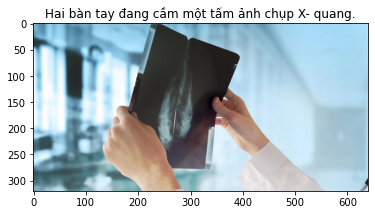

<Figure size 432x288 with 0 Axes>

In [36]:
threshold = 0.975
for i in np.where(cs[12] > threshold)[0]:
    plt.imshow(Image.open(img_path + ids[i]))
    plt.title(tokenizer.decode(t[i], skip_special_tokens=True))
    plt.figure()

In [37]:
threshold = 0.975

In [38]:
r, c = np.where(cs > threshold)

In [39]:
to_del = []
for i in np.unique(r):
    cs = c[r == i]
    to_del.append(cs[cs > i].tolist())

In [40]:
c[r==2]

array([   2, 1922, 1923, 5454, 6521, 6675, 7118])

In [41]:
to_del = sum(to_del, [])

In [48]:
to_del = np.unique(to_del).tolist()

In [49]:
len(to_del)

2271

In [50]:
len(e)

8962

In [53]:
to_del += drop_ids

In [54]:
keep = []
for i in range(len(e)):
    if i in to_del:
        keep.append(False)
    else:
        keep.append(True)

In [55]:
enp_dedup = np.array(enp[keep])
ids_dedup = np.array(ids[keep])
target_dedup = np.array(cleaned_target.numpy()[keep])

In [56]:
d2 = cosine_similarity(enp_dedup, enp_dedup)

In [57]:
ids_dedup.shape

(6689,)

In [58]:
enp_dedup.shape

(6689, 512)

In [59]:
target_dedup.shape

(6689, 64)

In [60]:
from transformers import AutoTokenizer
t = AutoTokenizer.from_pretrained("imthanhlv/gpt2news")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [63]:
np.unique(np.float32(enp_dedup), axis=0).shape

(6689, 512)

In [65]:
t.decode(target_dedup[1000], skip_special_tokens=True)

'Nhóm nhân viên y tế đang làm việc quanh một chiếc bàn.'

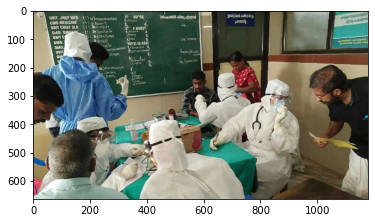

In [66]:
plt.imshow(Image.open(img_path + ids_dedup[1000]))

## Find labels

In [67]:
cleaned_sentences = np.array(cleaned_sentences)

In [68]:
cosine_with_full = cosine_similarity(enp_dedup, enp)

In [69]:
def find_labels(idx, threshold=0.975, debug=False):
    similar_mask = [cosine_with_full[idx] > 0.975]
    captions = cleaned_sentences[similar_mask]
    if debug is True:
        raw_path = img_path + ids_dedup[idx]
        raw_cap = tokenizer.decode(target_dedup[idx], skip_special_tokens=True)
        
        plt.figure()
        plt.imshow(Image.open(raw_path))
        plt.title(raw_cap)

        for i in np.where(similar_mask)[1]:

            plt.figure()
            plt.imshow(Image.open(img_path + ids[i]))
            plt.title(tokenizer.decode(cleaned_target[i], skip_special_tokens=True))
        
    return np.unique(captions, axis=0).tolist()

In [70]:
cosine_with_full.shape

(6689, 8962)

In [71]:
labels = []
for idx, _ in enumerate(tqdm(cosine_with_full)):
    labels.append(find_labels(idx))

  0%|          | 0/6689 [00:00<?, ?it/s]<ipython-input-69-23082138e870>:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  captions = cleaned_sentences[similar_mask]
100%|██████████| 6689/6689 [00:00<00:00, 36349.91it/s]


In [74]:
labels[0]

['Lọ thuốc được đặt cạnh lọ đựng.', 'Lọ thuốc đặt bên cạnh hộp đựng.']

In [87]:
torch.save({
    "clip_embedding": torch.tensor(enp_dedup),
    "target": torch.tensor(target_dedup),
    "ids": ids_dedup,
    "label": labels
}, "viecap_full_dedup.pt")

In [82]:
# train_img_clip = {
#     "clip_embedding": np.array(enp_dedup[:5000]),
#     "ids": np.array(ids_dedup[:5000]),
#     "target_sentence": list(labels[:5000])
# }
# torch.save(train_img_clip, "train_img_5k_full_sentence.pt")

test_img_clip = {
    "clip_embedding": torch.tensor(enp_dedup[5000:6000]),
    "ids": np.array(ids_dedup[5000:6000]),
    "target_sentence": list(labels[5000:6000]),
    "target": torch.tensor(target_dedup[5000:6000])
}

torch.save(test_img_clip, "test_viecap_1k.pt")

t = torch.load("./test_viecap_1k.pt")
print(t['clip_embedding'].shape)
print(t['target'].shape)


torch.Size([1000, 512])
torch.Size([1000, 64])


In [83]:
train_img_clip = {
    "clip_embedding": torch.tensor(enp_dedup[:5000]),
    "ids": np.array(ids_dedup[:5000]),
    "target_sentence": list(labels[:5000]),
    "target": torch.tensor(target_dedup[:5000])
}

torch.save(train_img_clip, "train_viecap_5k.pt")

t = torch.load("./train_viecap_5k.pt")
print(t['clip_embedding'].shape)
print(t['target'].shape)


torch.Size([5000, 512])
torch.Size([5000, 64])


In [341]:
# es, ids, ts = [], [], []

# for e, i, ss in zip(enp_dedup[:5000], ids_dedup[:5000], labels[:5000]):
#     for s in ss:
#         es.append(e)
#         ids.append(i)
#         ts.append(tokenize(s))
        
# train_img_clip = {
#     "clip_embedding": torch.tensor(es),
#     "ids": np.array(ids),
#     "target": torch.tensor(ts)
# }

# torch.save(train_img_clip, "train_img_5k_full_sentence.pt")

In [342]:
t = torch.load("./viecap_clean/train_img_5k_full_sentence.pt")

In [343]:
t.keys()

dict_keys(['clip_embedding', 'ids', 'target'])

In [351]:
t['clip_embedding'].shape

torch.Size([9629, 512])

In [350]:
tokenizer.decode(t['target'][4])

'Các viên thuốc màu trắng được xếp chồng lên nhau.<pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>'

### Text

In [ ]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image

In [ ]:
text = torch.load("./text_b16.pt")

In [ ]:
text.keys()

In [ ]:
text['clip_embedding'].shape

In [ ]:
text['target'].shape

In [ ]:
torch.save({
    "clip_embedding": torch.tensor(text['clip_embedding'][:5000]),
    "target": torch.tensor(text['target'][:5000])
}, "train_text_5k.pt")

In [ ]:
torch.save({
    "clip_embedding": torch.tensor(text['clip_embedding'][5000:6000]),
    "target": torch.tensor(text['target'][5000:6000])
}, "test_text_1k.pt")

In [ ]:
torch.save({
    "clip_embedding": torch.tensor(text['clip_embedding'][6000:6500]),
    "target": torch.tensor(text['target'][6000:6500])
}, "val_text_500.pt")